In [1]:
#导入../data/testPredict.npy
#导入../data/testY.npy
import numpy as np

testPredict = np.load('./data/testPredict.npy')
testY = np.load('./data/testY.npy')
print(testPredict.shape)
print(testY.shape)

(444, 100, 100, 1)
(444, 100, 100, 1)


In [2]:
data_min = 0.0
data_max = 4435
testPredict = testPredict * (data_max - data_min) + data_min
testY= testY * (data_max - data_min) + data_min

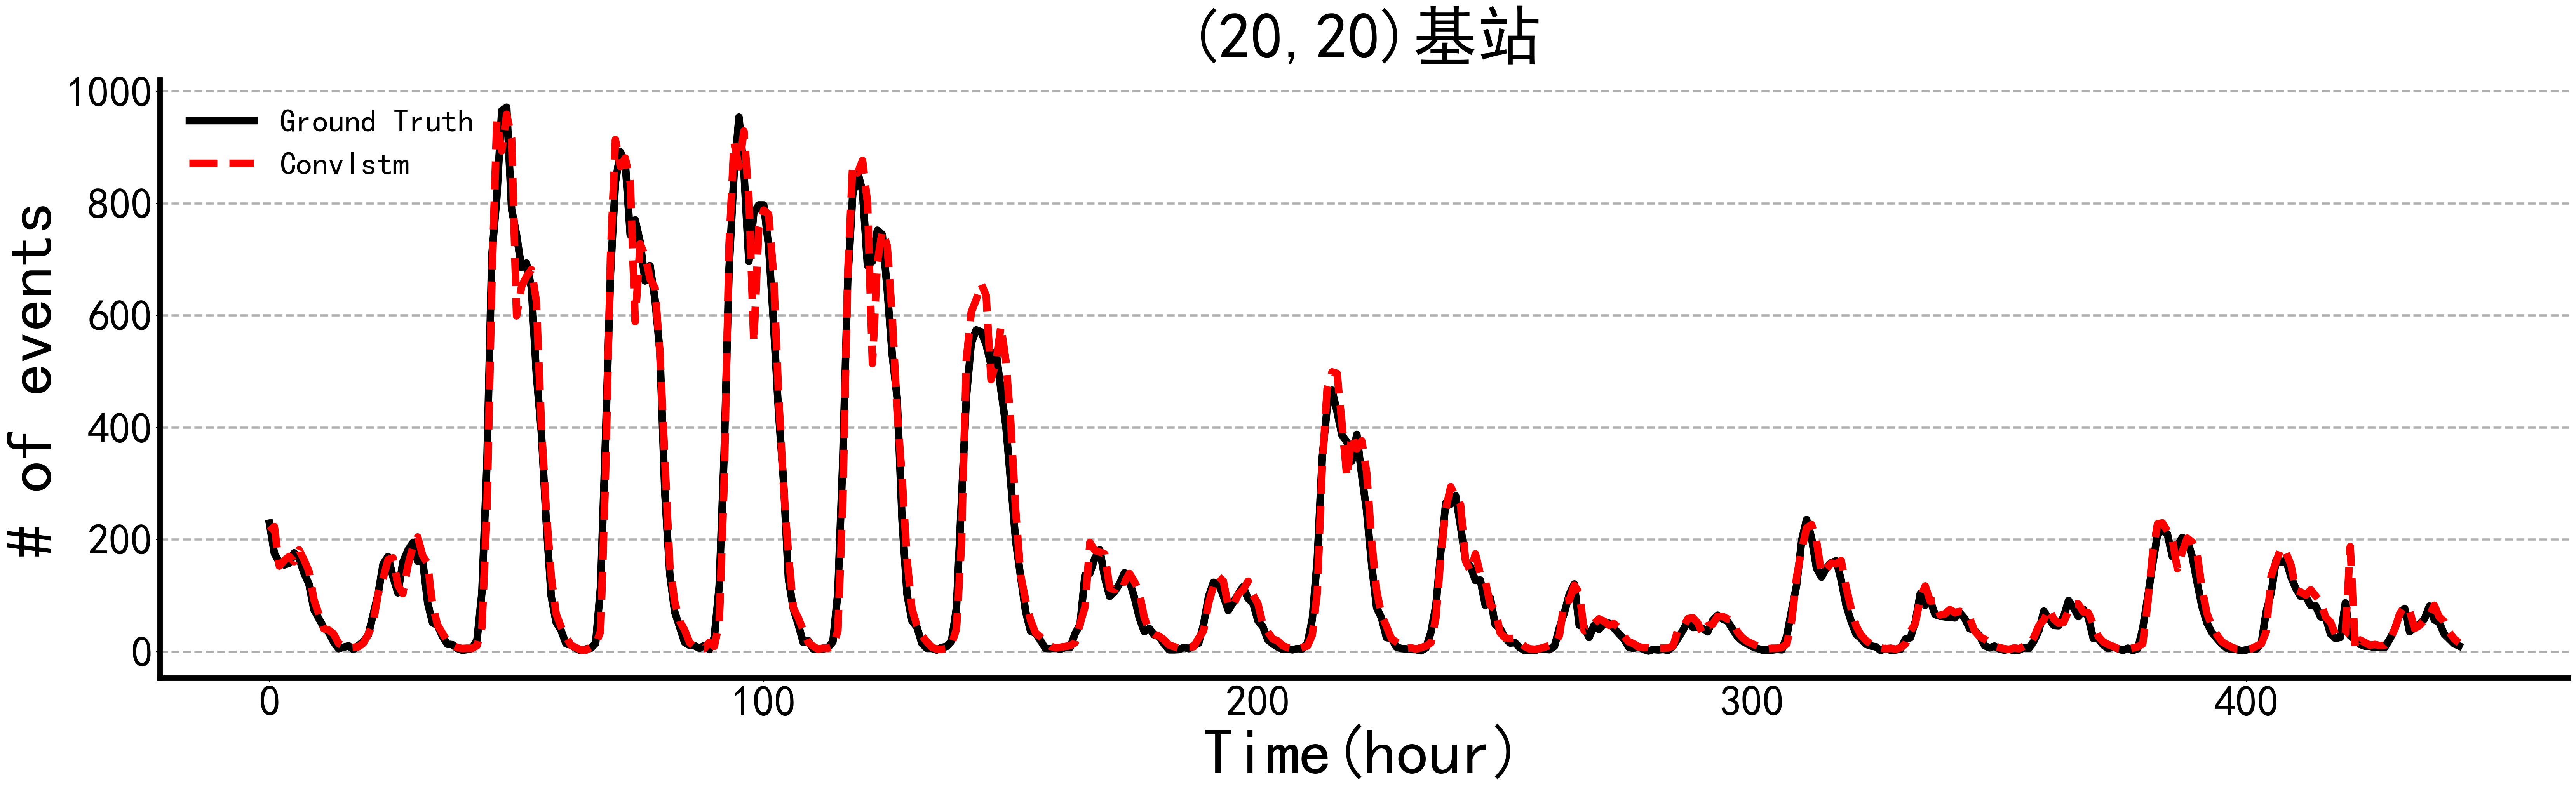

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time(hour)', fontsize=60,labelpad=5)
ax.set_ylabel('# of events', fontsize=60,labelpad=5)
#设置标题
ax.set_title('(20,20)基站',fontsize=60,pad=20)
ax.plot(testY[:,60,60,0],'black',label='Ground Truth',linewidth=7)
ax.plot(testPredict[:,60,60,0],'r--',label='Convlstm',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

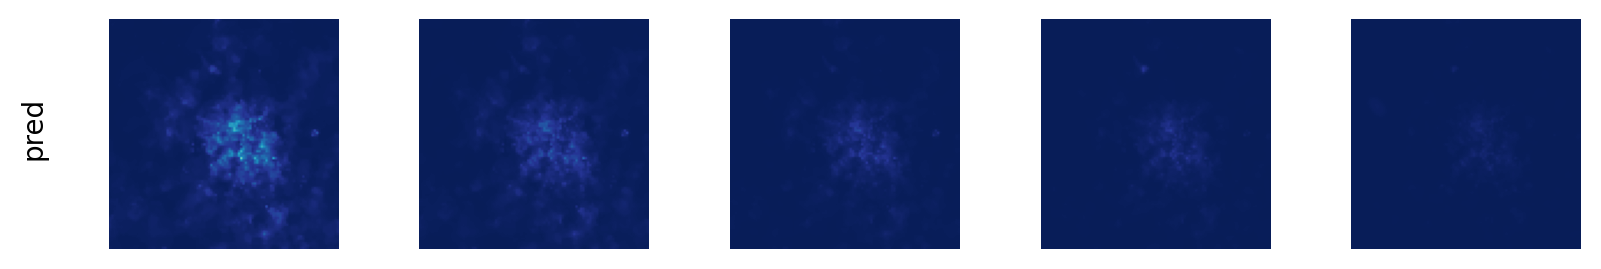

In [13]:
#绘制热力图子图
import matplotlib.pyplot as plt
#设置画板大小
plt.figure(figsize=(10,3),dpi=200)
#在一行子图最左边添加一个标签
plt.figtext(0.1,0.7,'pred',fontsize=10,rotation=90,va='center')
#去除子图之间的间距
plt.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(5):
   '''plt.subplot(2,5,i+1)
    #去掉子图的坐标轴
   plt.axis('off')
    #title
   plt.title(f't{i+5}',fontsize=10,pad=20)
   plt.imshow(testY[100+i+5,:,:,0],cmap='YlGnBu_r',vmin=0,vmax=1000)'''
   plt.subplot(2,5,i+1)
   plt.axis('off')
   plt.imshow(testPredict[100+i+5,:,:,0],cmap='YlGnBu_r',vmin=0,vmax=1000)
    


In [24]:
from  sklearn import  metrics
import numpy as np

def GetRMSE(y_hat,y_test):
    sum = np.sqrt(metrics.mean_squared_error(y_test, y_hat))
    return  sum

def GetMAE(y_hat,y_test):
    sum = metrics.mean_absolute_error(y_test, y_hat)
    return  sum

def GetMAPE_Order(y_hat,y_test):
    #删除test_y 为0元素
    zero_index = np.where(y_test == 0)
    y_hat = np.delete(y_hat,zero_index[0])
    y_test = np.delete(y_test,zero_index[0])
    sum = np.mean(np.abs((y_hat - y_test) / y_test)) * 100
    return sum
#计算R2
def GetR2(y_hat,y_test):
    sum = metrics.r2_score(y_test, y_hat)
    return sum



'''print("RMSE为",GetRMSE(testPredict,testY))
print("MAE为",GetMAE(testPredict,testY))
print("MAPE为",GetMAPE_Order(testPredict,testY))
print("R2为",GetR2(testPredict,testY))'''

'print("RMSE为",GetRMSE(testPredict,testY))\nprint("MAE为",GetMAE(testPredict,testY))\nprint("MAPE为",GetMAPE_Order(testPredict,testY))\nprint("R2为",GetR2(testPredict,testY))'

In [25]:
#计算每3天的误差

rmse,mae,mape,r2=[],[],[],[]
for i in range(0, len(testY), 72):
    data=testY[i:i+72].reshape(testY[i:i+72].shape[0]*10000,1)
    data1=testPredict[i:i+72].reshape(testY[i:i+72].shape[0]*10000,1)
    rmse.append(GetRMSE(data1,data))
    mae.append(GetMAE(data1,data))
    mape.append(GetMAPE_Order(data1,data))
    r2.append(GetR2(data1,data))
print("RMSE为",rmse)
print("MAE为",mae)
print("MAPE为",mape)
print("R2为",r2)
    
    

RMSE为 [16.390668031002043, 18.4941440515611, 15.613008486881148, 15.371770724420868, 10.226740287482997, 32.365549845359844, 10.387790003287163]
MAE为 [6.529121017999369, 7.706911975843164, 6.308655116396206, 6.464881478736257, 4.848484756696869, 8.172528279351244, 5.9247569376923055]
MAPE为 [370.06005397758787, 339.6420913060011, 311.5623799910269, 389.8224797523331, 396.4664756047939, 368.81751161990155, 70.08213843494697]
R2为 [0.968902465472568, 0.975462207642178, 0.9670221564266248, 0.959996012625622, 0.957626647194008, 0.6485027300299009, 0.9315130899742694]


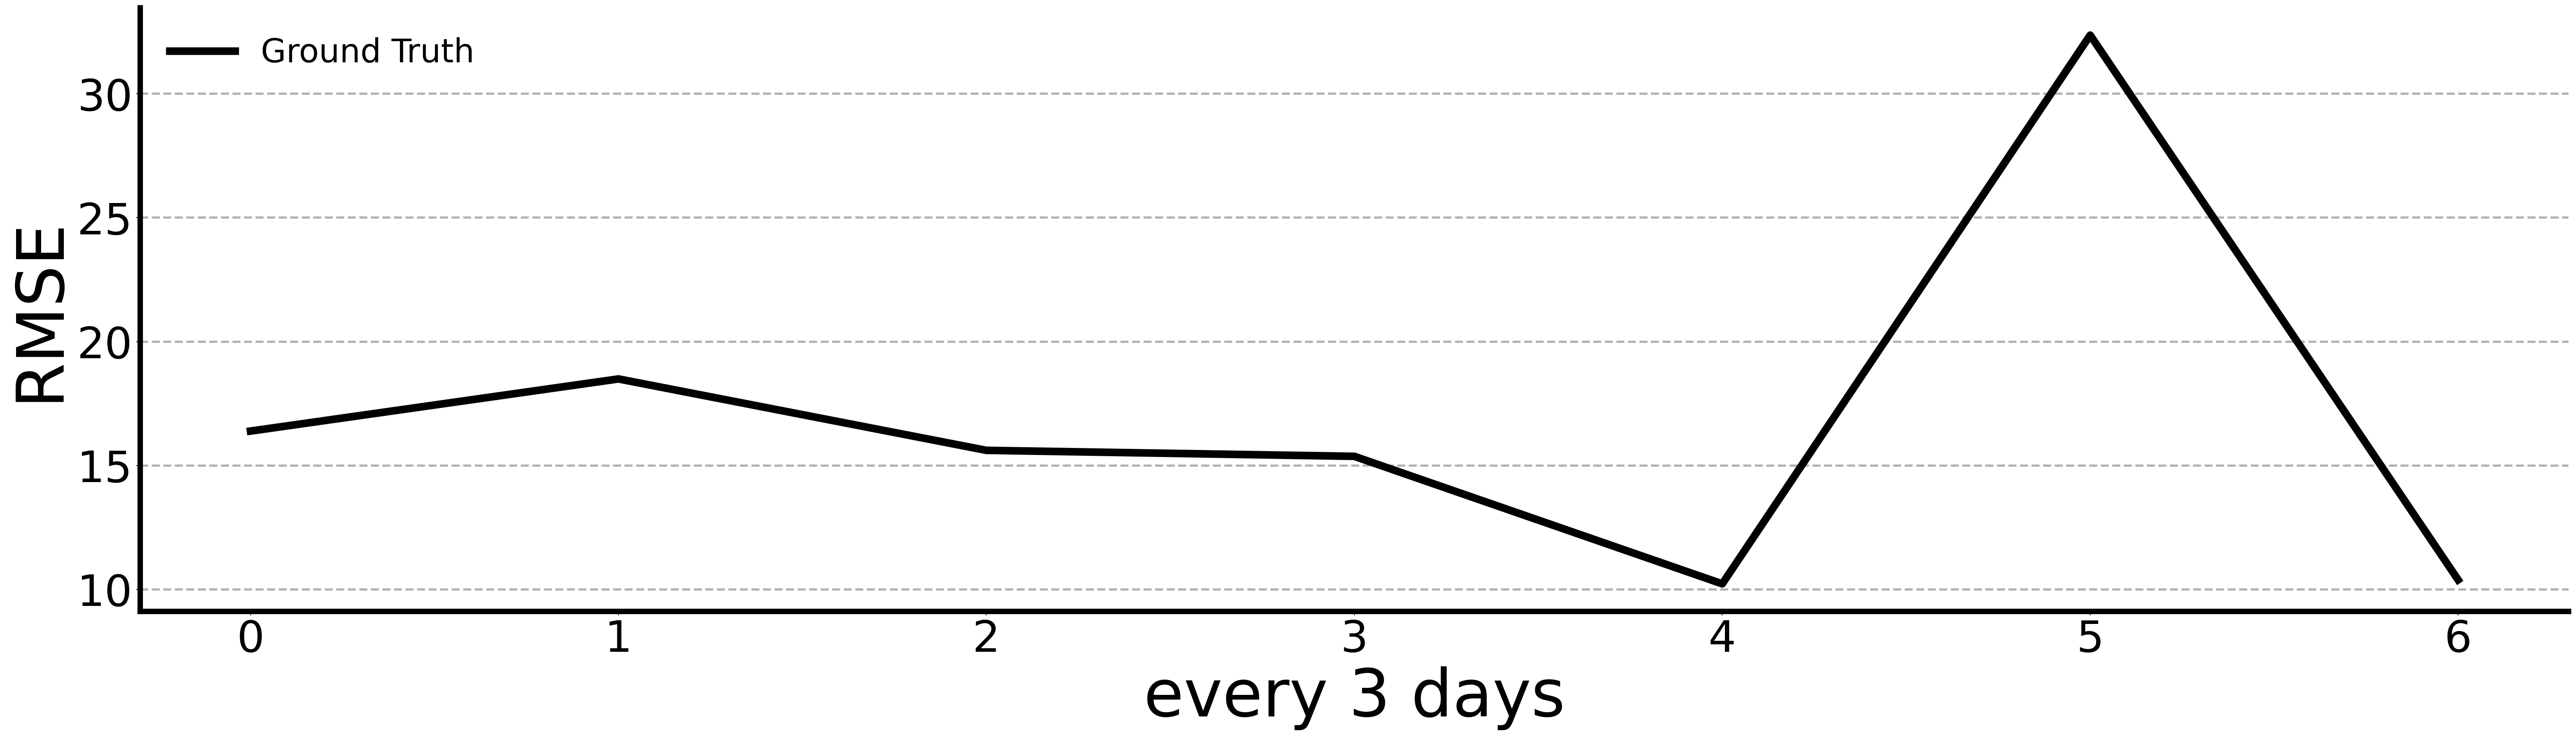

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('RMSE', fontsize=60,labelpad=5)
ax.plot(rmse,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

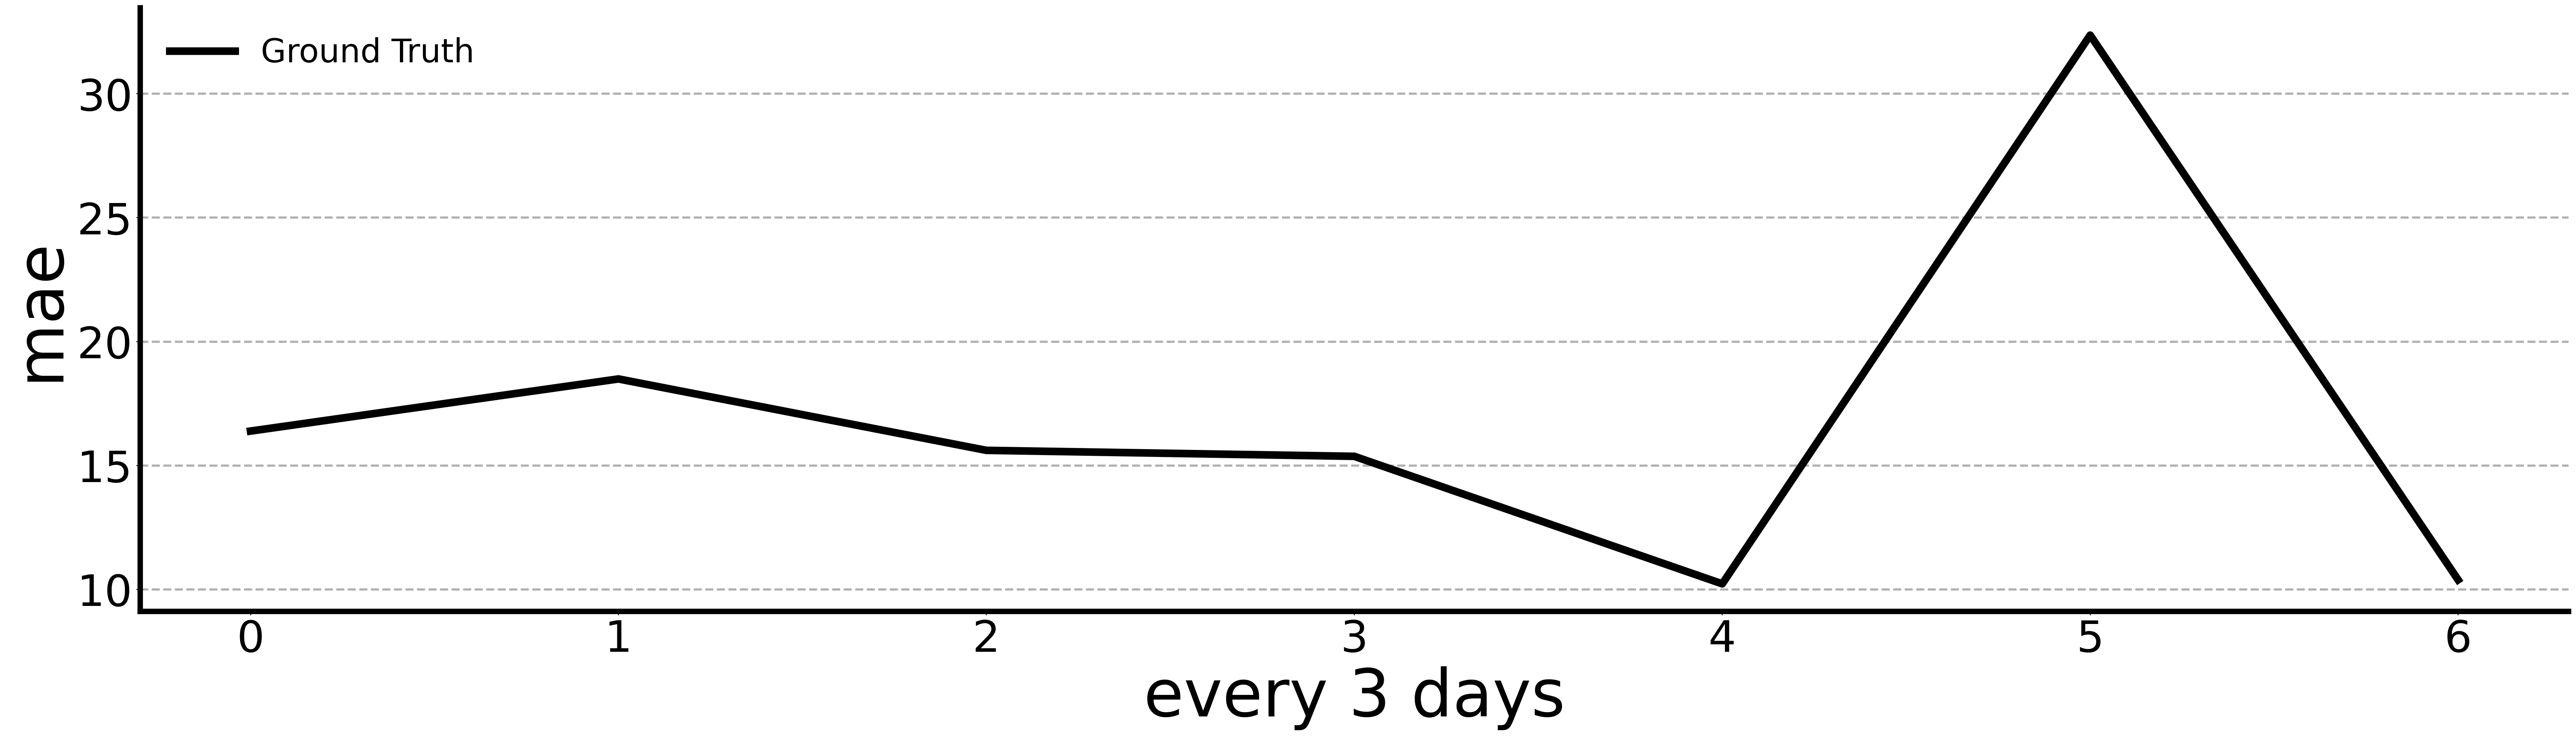

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(rmse,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

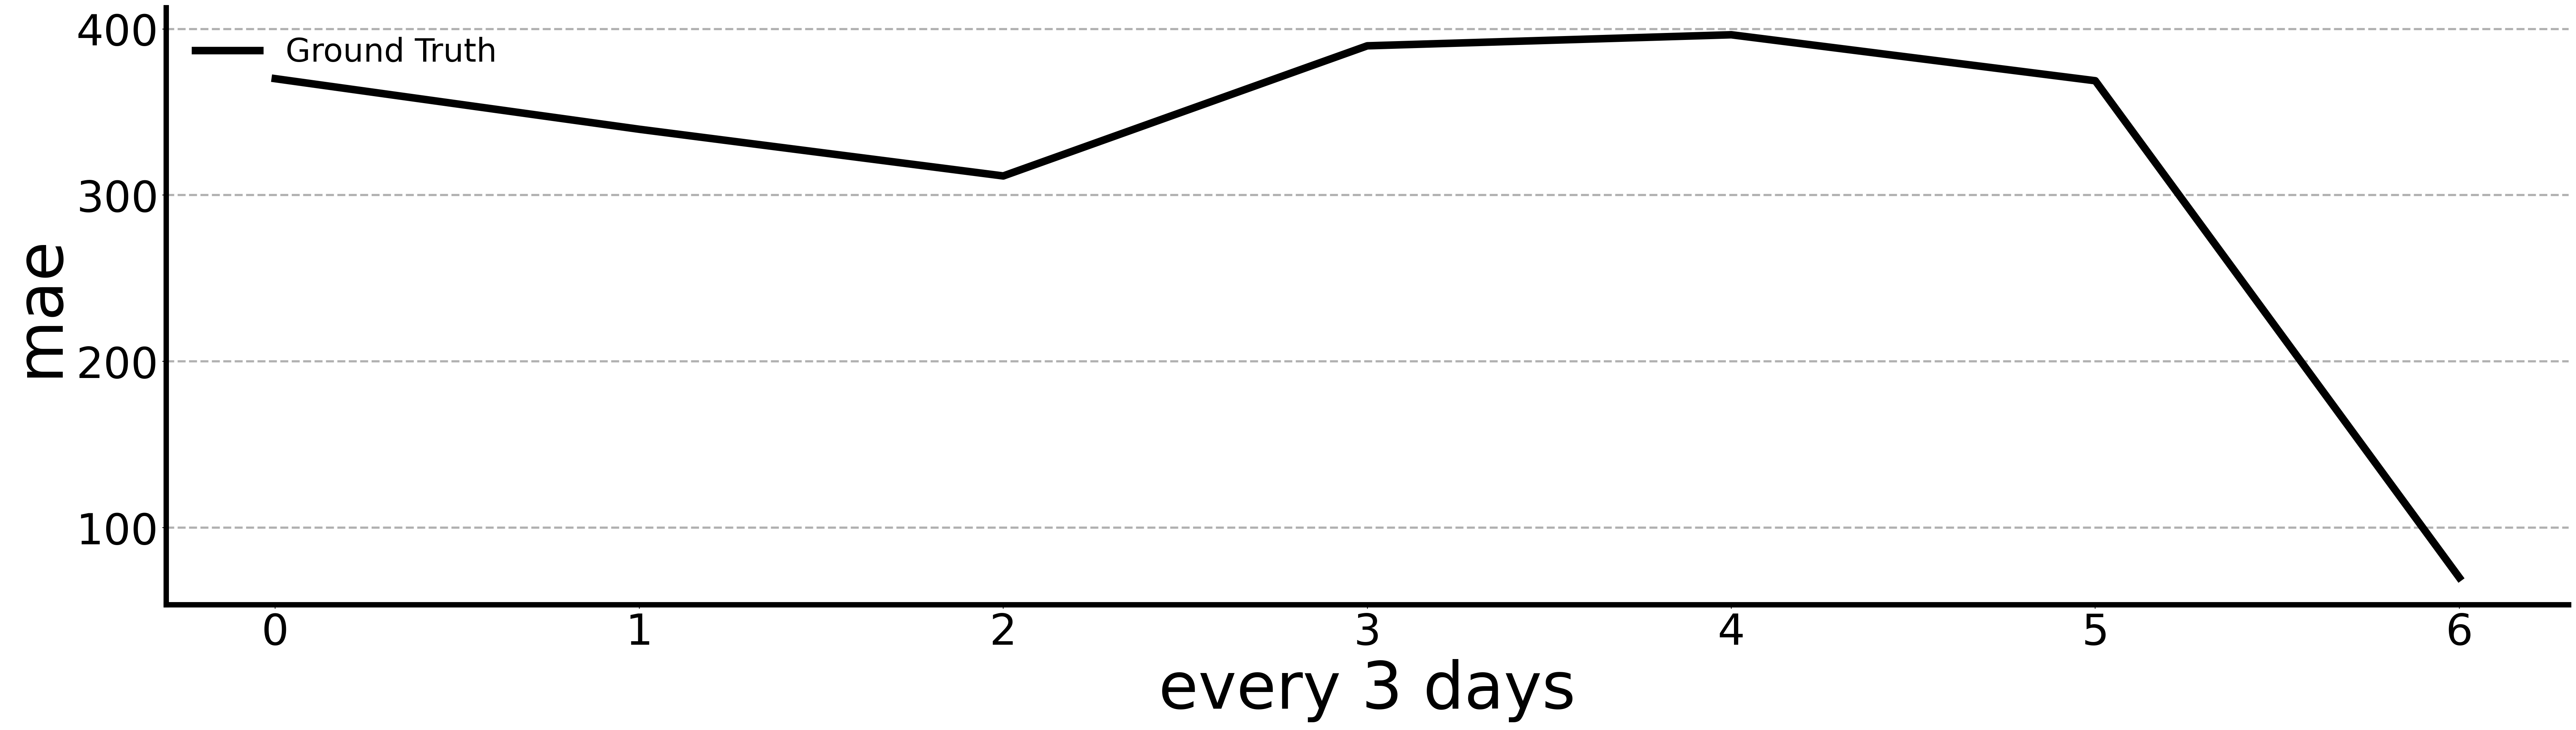

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(mape,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)

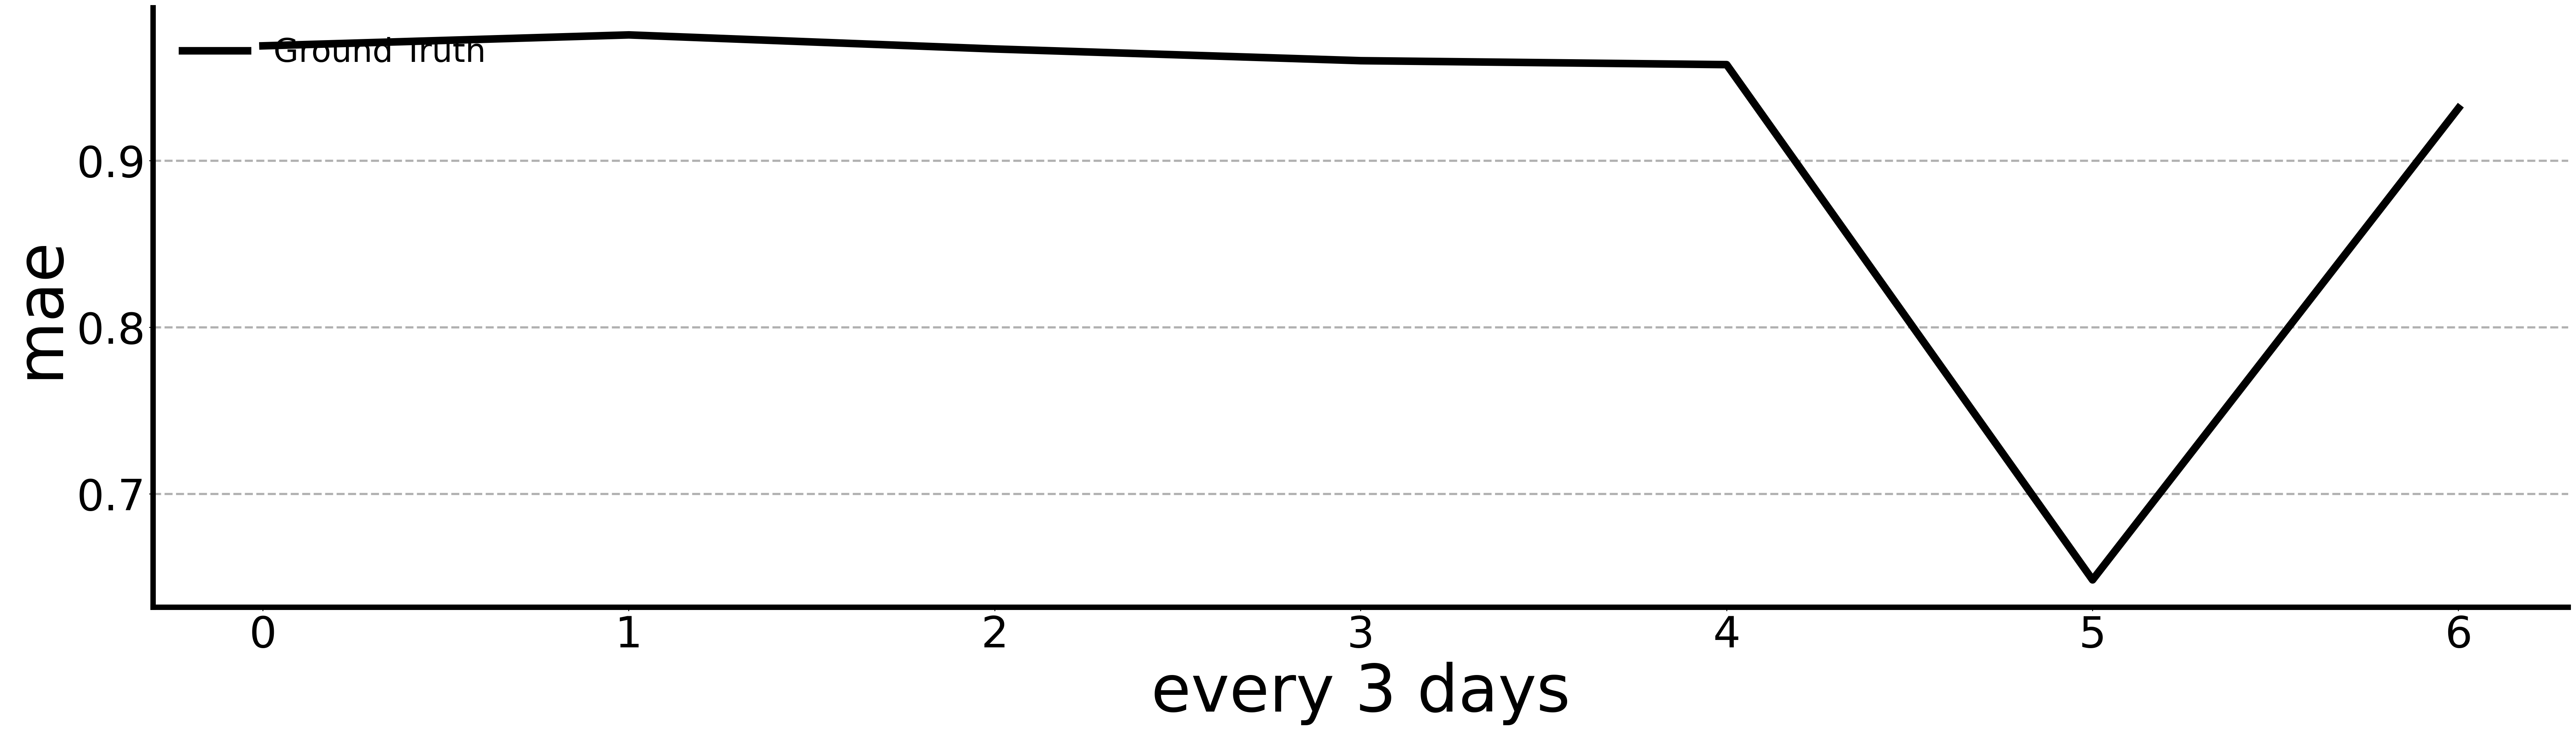

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 40
plt.rcParams['axes.linewidth'] = 5
# 可视化绘制
fig, ax = plt.subplots(figsize=(40,10),dpi=200)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('every 3 days', fontsize=60,labelpad=5)
ax.set_ylabel('mae', fontsize=60,labelpad=5)
ax.plot(r2,'black',label='Ground Truth',linewidth=7)
ax.legend(fontsize=30,loc='upper left',frameon=False)
#横线网格
ax.grid(axis='y',linestyle='--',linewidth=2)